In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#dataset
df = pd.read_csv('2-fft-normal-n-0-10.csv')
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
0,7,0,East,Local,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
1,7,10,East,Local,0xeddc0,GETS,0,3,2,8,10,10,23,7,3
2,11,11,South,West,0xeddc0,GETS,0,3,2,8,10,10,23,7,3
3,11,1,East,West,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
4,15,2,East,West,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650806,3265559,8,Local,East,0x2432c0,PUTS,1,1,2,8,27,11,24,8,3265536
650807,3265561,11,West,Local,0x2432c0,PUTS,3,1,2,11,27,11,24,8,3265536
650808,3265562,9,West,East,0x2432c0,PUTS,2,1,2,8,27,11,24,8,3265536
650809,3265565,10,West,East,0x2432c0,PUTS,3,1,2,8,27,11,24,8,3265536


In [3]:
df.dtypes

time               int64
router             int64
outport           object
inport            object
packet_address    object
packet_type       object
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [4]:
df.shape

(650811, 15)

In [5]:
df.describe()

,time,router,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,6.508110e+05,650811.000000,650811.000000,650811.000000,650811.000000,650811.000000,650811.000000,650811.000000,650811.000000,650811.000000,6.508110e+05
mean,1.769913e+06,6.238141,1.583913,1.416065,2.561576,10.764735,16.977766,6.254678,16.983293,6.347898,1.769892e+06
std,1.079002e+06,4.238010,1.497644,0.987835,0.898769,3.656470,9.821256,4.480925,9.915548,4.607044,1.079001e+06
min,7.000000e+00,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,7.437775e+05,3.000000,0.000000,1.000000,2.000000,8.000000,10.000000,2.000000,10.000000,2.000000,7.437450e+05
50%,1.841983e+06,6.000000,1.000000,1.000000,2.000000,9.000000,20.000000,7.000000,20.000000,7.000000,1.841979e+06
75%,2.696330e+06,10.000000,3.000000,2.000000,4.000000,16.000000,24.000000,10.000000,24.000000,10.000000,2.696318e+06
max,3.265566e+06,15.000000,4.000000,3.000000,4.000000,19.000000,31.000000,15.000000,31.000000,15.000000,3.265536e+06


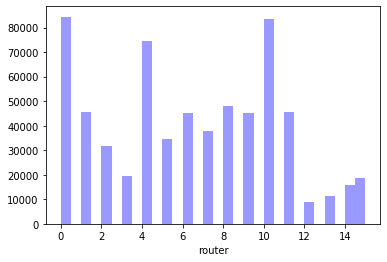

In [6]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

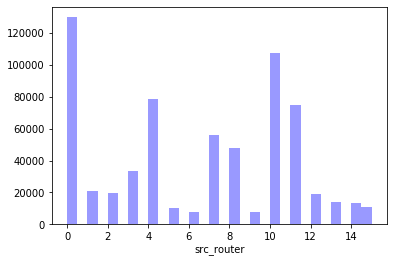

In [7]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

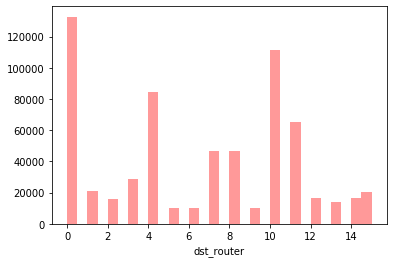

In [8]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

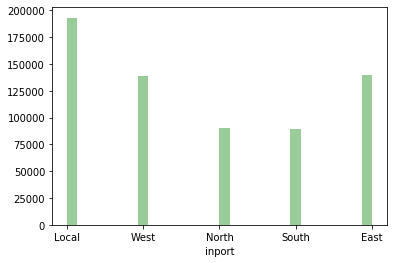

In [9]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

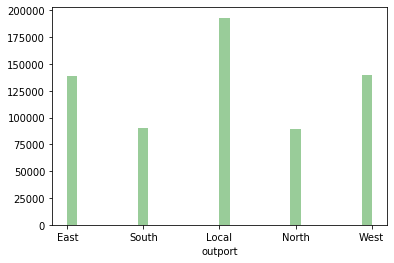

In [10]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

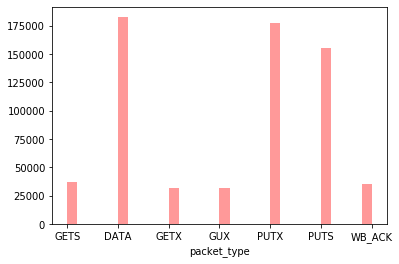

In [11]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')

In [12]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [13]:
data = {'GETS': 1,'GETX': 2,'GUX': 3,'DATA': 4, 'PUTX': 5,'PUTS': 6,'WB_ACK':7}
df = df.replace({'packet_type': data})

In [14]:
df['flit_id'] = df['flit_id']+1
df['flit_type'] = df['flit_type']+1
df['vnet'] = df['vnet']+1
df['vc'] = df['vc']+1

In [15]:
df.dtypes

time               int64
router             int64
outport            int64
inport             int64
packet_address    object
packet_type        int64
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [16]:
hoparr = {"0to0":0,"0to1":1,"0to2":2,"0to3":3,"0to4":1,"0to5":2,"0to6":3,"0to7":4,"0to8":2,"0to9":3,"0to10":4,"0to11":5,"0to12":3,"0to13":4,"0to14":5,"0to15":6,
         "1to1":0,"1to2":1,"1to3":2,"1to4":2,"1to5":1,"1to6":2,"1to7":3,"1to8":3,"1to9":2,"1to10":3,"1to11":4,"1to12":5,"1to13":3,"1to14":4,"1to15":5,
         "2to2":0,"2to3":1,"2to4":3,"2to5":2,"2to6":1,"2to7":2,"2to8":4,"2to9":3,"2to10":2,"2to11":3,"2to12":5,"2to13":4,"2to14":3,"2to15":4,
         "3to3":0,"3to4":4,"3to5":3,"3to6":2,"3to7":1,"3to8":5,"3to9":4,"3to10":3,"3to11":2,"3to12":6,"3to13":5,"3to14":4,"3to15":3,
         "4to4":0,"4to5":1,"4to6":2,"4to7":3,"4to8":1,"4to9":2,"4to10":3,"4to11":4,"4to12":2,"4to13":3,"4to14":4,"4to15":5,
         "5to5":0,"5to6":1,"5to7":2,"5to8":2,"5to9":1,"5to10":2,"5to11":3,"5to12":3,"5to13":2,"5to14":3,"5to15":4,
         "6to6":0,"6to7":1,"6to8":3,"6to9":2,"6to10":1,"6to11":2,"6to12":4,"6to13":3,"6to14":2,"6to15":3,
         "7to7":0,"7to8":4,"7to9":3,"7to10":2,"7to11":1,"7to12":5,"7to13":4,"7to14":3,"7to15":2,
         "8to8":0,"8to9":1,"8to10":2,"8to11":3,"8to12":1,"8to13":2,"8to14":3,"8to15":4,
         "9to9":0,"9to10":1,"9to11":2,"9to12":2,"9to13":1,"9to14":2,"9to15":4,
         "10to10":0,"10to11":1,"10to12":3,"10to13":2,"10to14":1,"10to15":2,
         "11to11":0,"11to12":4,"11to13":3,"11to14":2,"11to15":1,
         "12to12":0,"12to13":1,"12to14":2,"12to15":3,
         "13to13":0,"13to14":1,"13to15":2,
         "14to14":0,"14to15":1,
         "15to15":0}

In [17]:
packarr = {}
packtime = {}
packchunk = []
hopcurrentarr = []
hoptotarr = []
hoppercentarr =[]
waitingarr = []
interval = 500
count = 0
for index, row in df.iterrows():
    current_time = row["time"]
    enqueue_time = row["enq_time"]
    waiting_time = current_time - enqueue_time
    waitingarr.append(waiting_time)
    current_router = row["router"]
    src_router = row["src_router"]
    dst_router = row["dst_router"]
    src_router_temp = src_router
    if src_router_temp>dst_router:
        temph = src_router_temp
        src_router_temp = dst_router
        dst_router = temph
    hop_count_string = str(src_router_temp)+"to"+str(dst_router)
    src_router_temp = src_router
    hop_count = hoparr.get(hop_count_string)
    if src_router_temp>current_router:
        tempc = src_router_temp
        src_router_temp = current_router
        current_router = tempc
    current_hop_string = str(src_router_temp)+"to"+str(current_router)
    current_hop = hoparr.get(current_hop_string)
    if(current_hop == 0 and hop_count ==0):
        hop_percent = 0
    else:
        hop_percent = current_hop/hop_count
    hoptotarr.append(hop_count)
    hopcurrentarr.append(current_hop)
    hoppercentarr.append(hop_percent)
    if row["packet_address"] not in packarr:
        packarr[row["packet_address"]] = count
        packtime[row["packet_address"]] = row["time"]
        packchunk.append(packarr.get(row["packet_address"]))
        count+=1
    else:
        current_time = row["time"]
        position = packarr.get(row["packet_address"])
        pkt_time = packtime.get(row["packet_address"])
        current_max = max(packarr.values())
        if (current_time-pkt_time)<interval:
            packchunk.append(packarr.get(row["packet_address"]))
        else:
            del packarr[row["packet_address"]]
            del packtime[row["packet_address"]]
            packarr[row["packet_address"]] = current_max+1
            packtime[row["packet_address"]] = row["time"]
            packchunk.append(packarr.get(row["packet_address"]))
            if (current_max)==count:
                count+=2
            elif (current_max+1)==count:
                count+=1

In [18]:
df['packet_address'].nunique()

3828

In [19]:
print(len(packarr))

3828


In [20]:
print(len(packchunk))

650811


In [21]:
df = df.assign(traversal_id=packchunk)
df = df.assign(hop_count=hoptotarr)
df = df.assign(current_hop=hopcurrentarr)
df = df.assign(hop_percentage=hoppercentarr)
df = df.assign(enqueue_time=waitingarr)

In [22]:
df.rename(columns={'packet_type': 'cache_coherence_type', 'time': 'timestamp'}, inplace=True)

In [23]:
df = df.drop(columns=['packet_address','enq_time'])

In [24]:
df.isnull().sum()

timestamp               0
router                  0
outport                 0
inport                  0
cache_coherence_type    0
flit_id                 0
flit_type               0
vnet                    0
vc                      0
src_ni                  0
src_router              0
dst_ni                  0
dst_router              0
traversal_id            0
hop_count               0
current_hop             0
hop_percentage          0
enqueue_time            0
dtype: int64

In [25]:
df.dtypes

timestamp                 int64
router                    int64
outport                   int64
inport                    int64
cache_coherence_type      int64
flit_id                   int64
flit_type                 int64
vnet                      int64
vc                        int64
src_ni                    int64
src_router                int64
dst_ni                    int64
dst_router                int64
traversal_id              int64
hop_count                 int64
current_hop               int64
hop_percentage          float64
enqueue_time              int64
dtype: object

In [26]:
df.head(10)

,timestamp,router,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time
0,7,0,2,0,1,1,4,3,9,0,0,23,7,0,4,0,0.00,4
1,7,10,2,0,1,1,4,3,9,10,10,23,7,1,2,0,0.00,4
2,11,11,3,4,1,1,4,3,9,10,10,23,7,1,2,1,0.50,8
3,11,1,2,4,1,1,4,3,9,0,0,23,7,0,4,1,0.25,8
4,15,2,2,4,1,1,4,3,9,0,0,23,7,0,4,2,0.50,12
5,15,7,0,1,1,1,4,3,9,10,10,23,7,1,2,2,1.00,12
6,19,3,1,4,1,1,4,3,9,0,0,23,7,0,4,3,0.75,16
7,23,7,0,3,1,1,4,3,9,0,0,23,7,0,4,4,1.00,20
8,54,7,4,0,4,1,1,5,17,23,7,10,10,1,2,0,0.00,4
9,55,7,4,0,4,2,2,5,17,23,7,10,10,1,2,0,0.00,5


In [27]:
df.to_csv('2-fft-normal-n-0-10-data.csv',index=False)